## Detecting Quantum Bit Flip errors
- Quantum error correction is used to protect quantum information from errors due to **decoherence and other quantum noise**
- This task is to implement the *bit-flip code* and the *sign-flip code* for quantum circuits

In [19]:
from qiskit import *
import random as random
import numpy as np
import matplotlib as mt
from qiskit.tools.visualization import plot_bloch_multivector,plot_histogram
print("Qiskit:",qiskit.__version__)
print("Numpy:",np.__version__)
print("Matplotlib:",mt.__version__)
%matplotlib inline

Qiskit: 0.16.1
Numpy: 1.19.4
Matplotlib: 3.1.1


### Libraries used
- **qiskit** - version : 0.16.1
    - The main library used for the implementation of the given task was *qiskit* by IBM. 
    - Inbuilt methods for the plotting of states, measurements and gate operations were used to implement the tasks given.
- **numpy** - version : 1.19.4 and **random**
    - numpy and random was used for used for random number generation in the sub-task 2 for obtaining the probabilities of error gates.
- **matplotlib** - version : 3.1.1
    - For plotting of the results obtained in the simulation

## Subtask 1
- Creating the Bell State ( a maximally entangled state )
 $$ \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

The Bell State


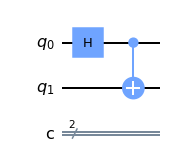

In [2]:
# creating a quantum circuit with 2 quantum and 
# 2 classical bits
Q = QuantumCircuit(2,2) 
Q.h(0) # applying the hadamard gate on Qubit 0
Q.cx(0,1) # applying the controlled-not gate with 
          # control as 0 and target as 1 
print("The Bell State")
Q.draw(output = 'mpl') # visualizing the circuit

- Measuring and visualizing the probabilities of measurement

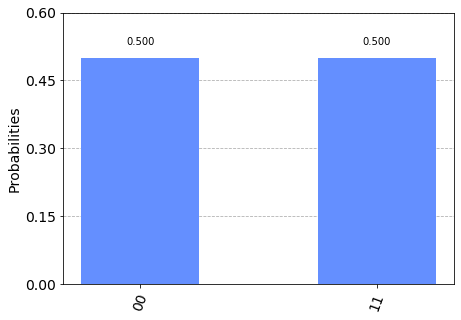

In [3]:
# Plotting on the histogram
Qplot = Q 
Qplot.measure([0,1],[0,1])
counts = execute(Q,backend= Aer.get_backend('qasm_simulator'),shots=2000).result().get_counts()
plot_histogram(counts)

- We can see that the maximally entangled Bell state has indeed been prepared  

## Subtask 2
- Adding arbitrary *error* gates for each qubit, just before the CNOT gate
-  **THOUGHT** 
    - Since the number of choices for each qubit is 3 and we have 2 qubits, we would have a total of 9 possible combinations for our gates.
    - We can *map* each gate to a number and then pick that number from a list for each qubit
    - The gate mapped to the number is attached to the qubit with the corresponding probability
    - The *dirichlet* function is used to generate random probabilities which sum up to one 
    - These probability values are passed as **weights** to a choice function which generates the random item from list
- **MAPPING NUMBERS TO GATES** $$1:I$$
$$ 2 : X$$
$$ 3 : Z$$

In [4]:
def gate_params():
    '''RETURNS: a randomly generated 2-tuple consisting of 
       numbers from [1,2,3] which map to a
       unitary quantum gate'''
    
    # pick for the first qubit 
    p1 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p1)
    n1 = random.choices([1,2,3],weights = p1[0],k=1)[0]
    
    # now pick for second qubit 
    p2 = np.random.dirichlet(np.ones(3), size = 1)
    print("Probabilities are :",p2)
    n2 = random.choices([1,2,3],weights = p2[0],k=1)[0]
    
    #choice
    print("Numbers chosen are :",n1,n2)
    return (n1,n2)


In [5]:
def add_gate(Q,q,n):
    '''PARAMETERS : Q-> quantum circuit
                    q-> qubit number
                    i-> gate number
       RETURNS: Quantum circuit with attached gate'''
    if(n==1):
        Q.i(q)
    elif(n==2):
        Q.x(q)
    elif(n==3):
        Q.z(q)
    else:
        raise Exception("Incorrect Gate parameter specified.")
        return 
    return Q
def attach_gates(Q,numbers):
    '''
    PARAMETERS: Q-> QuantumCircuit, numbers-> 2-tuple containing numbers
    RETURNS : QuantumCircuit with attached gates
    is returned '''
    if len(numbers)!=2:
        raise Exception("Incorrect size of tuple")
        return
    # get gate numbers
    g1 = numbers[0]
    g2 = numbers[1]
    if(type(g1)!= int or type(g2)!=int):
        raise TypeError("Incorrect values in numbers.")
        return
    Q = add_gate(Q,0,g1)
    Q = add_gate(Q,1,g2)
    
    #return circuit
    return Q
    

Probabilities are : [[0.11828994 0.5969052  0.28480486]]
Probabilities are : [[0.0218417  0.23608578 0.74207251]]
Numbers chosen are : 2 3


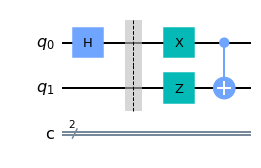

In [17]:
Q = QuantumCircuit(2,2)
numbers = gate_params()
Q.h(0)
Q.barrier()
# attach gates 
Q = attach_gates(Q,numbers)
Q.cnot(0,1)
Q.draw(output='mpl')

## Subtask 3
- The number of total combinations that we would have pertaining to the 2 qubits is 9
- These nine combinations are shown below -

All the possible errors that may occur in the channel :


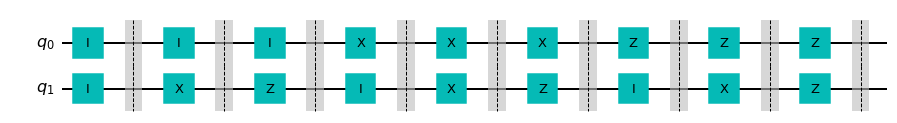

In [28]:
gates = QuantumCircuit(2)
for i in range(1,4):
    for j in range(1,4):
        gates = add_gate(gates,0,i)
        gates = add_gate(gates,1,j)
        gates.barrier()
print("All the possible errors that may occur in the channel :")
gates.draw(output='mpl')

### Observations

 #### Qubit 1 (control)
- Qubit 1 needs to be corrected for *both bit and phase* flips as the state i.e. |+> for qubit 1 would be affected pertatining to both kinds of the errors, for **Z** and **X**, encountered in the channel
#### Qubit 2 (target)
- Coming on to the Qubit 2, since the state for the qubit is only |0>, no phase correction code is required pertaining to that qubit, as $$Z|0\rangle=|0\rangle$$ operator has no change for the |0> state. 
- But for $$X$$ gate, the bit flip error correction code must be applied for the Qubit 2 as the gate would actually affect the state |0> by flipping it to |1>, $$X|0\rangle = |1\rangle$$